# In this example we will calculate each basis polynomial

In [1]:
using NLOptControl
using Plots
pyplot()
default(guidefont = font(17), tickfont = font(15), legendfont = font(12), titlefont = font(20))


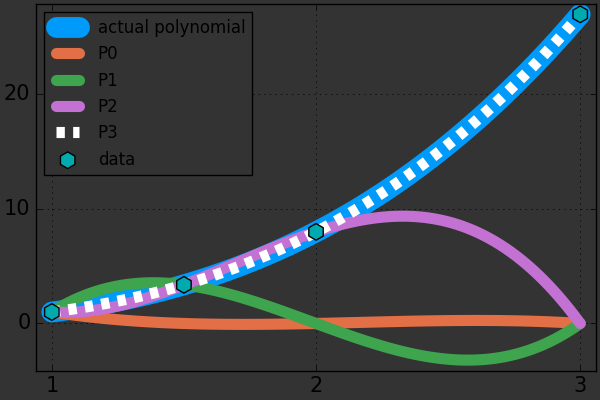

In [17]:
# example, interpolate f(x) = x^3 over 1<=x<=3 given
x_data = [1,1.5,2,3];
y_data = [1,1.5^3,8,27];
x0 = 1; xf = 3;
ns = 100; 
x = Array(linspace(x0,xf,ns));
y = x.^3;
N = 3; # order of Lagrange Polynomial


L = lagrange_basis_poly(x,x_data,N)

P = zeros(Float64,N+1,ns)
for idx in 1:N+1  
    if idx==1
        P[idx,:] = y_data[idx]*L[idx,:]
    else
        P[idx,:] = y_data[idx]*L[idx,:] + P[idx-1,:]
    end
end


plot(x,y,label= "actual polynomial",w=15)
plot!(x,P[1,:],w=8,label="P0")
plot!(x,P[2,:],w=8,label="P1")
plot!(x,P[3,:],w=8,label="P2")
plot!(x,P[4,:],line=(8,:dash,:white),label="P3",background_color=RGB(0.2,0.2,0.2))
scatter!(x_data,y_data,markersize =12,markershape = :hexagon,label="data")


In [18]:
savefig("test2a.png")